<h1 style="color:blue; text-align:center">ISAT 300: Applied Computing, Instrumentation and Measurement</h1>
<h2 style="color:red; text-align:center">Lab 6: Solar Panel Evaluation</h2>
<h3 style="color:purple; text-align:center">Jake Obenhein</h3>
<h3 style="color:purple; text-align:center">Honor Pledge: On my honor, I have neither given nor received help on this assignment.</h3>

## Abstract
<!-- Generated by ChatGPT. -->
Solar energy represents a pivotal solution in addressing the environmental impact of conventional energy sources while meeting the escalating global energy demand. This study explores the evaluation of two distinct solar panels through systematic experimentation and analysis. Utilizing a breadboard resistor setup and a multimeter, the performance of "cheap" and "expensive" solar panels is examined under various lighting conditions. Data analysis includes voltage and current measurements under artificial and room lighting. Mean values and standard deviations are computed, shedding light on the panels' performance nuances. Statistical tests are conducted to ascertain significant differences, with a focus on power generation capabilities. Results indicate noteworthy distinctions between the panels' power outputs, challenging initial expectations. However, limitations such as inconsistent lighting conditions underscore the need for further investigation. Beyond immediate implications, this study underscores the critical importance of solar panel evaluation in driving sustainability, economic viability, innovation, and safety within the renewable energy sector. Ultimately, robust evaluation practices are pivotal in unlocking the full potential of solar energy and fostering a sustainable energy future.

## Introduction

Solar energy has emerged as a prominent solution to mitigate the environmental impact of traditional energy sources while meeting the escalating global energy demand. Central to harnessing solar power are photovoltaic (PV) panels, which convert sunlight into electricity. However, the performance and efficiency of these panels can vary significantly due to factors such as design, materials, and environmental conditions. The purpose of this study is to evaluate the performance of two different solar panels through systematic experimentation and analysis.

This simple test used a breadboard resistor setup and a multimeter. Two solar panels of different prices (“cheap” or “expensive”) were tested in two different setups, where the current and voltage were both measured when each panel was put under a flashlight, under normal room lighting, and in complete darkness. Since there was no current in complete darkness, there was no power, and therefore, the power was not accounted for in complete darkness. A total of ten trials ($n = 10$) were run on each setup.

<img src="images/solarpanel.jpg" alt="A breadboard setup for a mini solar panel." width="300" height="300"/>

## Import packages
We will need to use the packages NumPy, pandas, and matplotlib. We will also need to import the math package for our square root function.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Load data into pandas DataFrame

In [2]:
df = pd.read_csv('data/Lab6Data.csv')
df = df.dropna() #removes all NaN (not a number) values
df

trial  voltage_art1  voltage_room1  voltage_dark1  current_art1  \
0    1.0          2.07           1.87           0.03          0.39   
1    2.0          2.12           1.85           0.02          0.36   
2    3.0          2.28           1.85           0.02          0.36   
3    4.0          2.36           1.85           0.03          0.37   
4    5.0          2.33           1.85           0.02          0.41   
5    6.0          2.34           1.85           0.02          0.37   
6    7.0          2.32           1.85           0.02          0.50   
7    8.0          2.26           1.85           0.02          0.38   
8    9.0          2.28           1.85           0.02          0.39   
9   10.0          2.19           1.85           0.02          0.37   

   current_room1  current_dark1  voltage_art2  voltage_room2  voltage_dark2  \
0           0.07            0.0          2.29           1.79           0.06   
1           0.07            0.0          2.09           1.85           0.10   
2           0.07            0.0          2.06           1.86           0.07   
3           0.07            0.0          2.25           1.85           0.07   
4           0.07            0.0          2.28           1.82           0.11   
5           0.07            0.0          2.32           1.85           0.13   
6           0.07            0.0          2.26           1.85           0.09   
7           0.07            0.0          2.22           1.85           0.08   
8           0.07            0.0          2.23           1.84           0.13   
9           0.07            0.0          2.23           1.85           0.12   

   current_art2  current_room2  current_dark2  
0          0.27           0.05            0.0  
1          0.26           0.05            0.0  
2          0.24           0.04            0.0  
3          0.25           0.05            0.0  
4          0.25           0.05            0.0  
5          0.26           0.04            0.0  
6          0.27           0.04            0.0  
7          0.24           0.04            0.0  
8          0.25           0.04            0.0  
9          0.25           0.04            0.0

## Grab the mean values and standard deviations ($\sigma$)

For the purposes of this experiment, "art" means any value measured under artificial lighting (a flashlight) and "room" for any measured under regular room lighting. "dark" means that it was measured in complete darkness, but for the purposes of this experiment, it was not included because there was no current in complete darkness (resulting in zero power). Any variable with "1" represents the cheap solar panel while any with "2" represents the expensive one. We will grab all columns' mean values and standard deviations (except for in complete darkness, since there is no current and the voltage is pretty much the same), and print them accordingly.

In [3]:
columns = ['voltage_art1', 'voltage_room1', 'voltage_art2', 'voltage_room2',
           'current_art1', 'current_room1', 'current_art2', 'current_room2']

# Dictionary to store mean and standard deviation for each column
statistics = {}

for col in columns:
    statistics['{}_mean'.format(col)] = df[col].mean(numeric_only=True)
    statistics['{}_std'.format(col)] = df[col].std(numeric_only=True)

# Unpack dictionary to individual variables
locals().update(statistics)

unit_mapping = { #defines units for each variable
    'voltage_art1_mean': "Volts", 'voltage_art1_std': "Volts",
    'voltage_room1_mean': "Volts", 'voltage_room1_std': "Volts",
    'voltage_art2_mean': "Volts", 'voltage_art2_std': "Volts",
    'voltage_room2_mean': "Volts", 'voltage_room2_std': "Volts",
    'current_art1_mean': "Amps", 'current_art1_std': "Amps",
    'current_room1_mean': "Amps", 'current_room1_std': "Amps",
    'current_art2_mean': "Amps", 'current_art2_std': "Amps",
    'current_room2_mean': "Amps", 'current_room2_std': "Amps"
}

for key, value in statistics.items():
    unit = unit_mapping.get(key, "Unknown Unit")  # Get the unit based on the key
    print("{}: {:.5f} {}".format(key, value, unit))  # Print all values to four decimal places with the respective unit

voltage_art1_mean: 2.25500 Volts
voltage_art1_std: 0.09778 Volts
voltage_room1_mean: 1.85200 Volts
voltage_room1_std: 0.00632 Volts
voltage_art2_mean: 2.22300 Volts
voltage_art2_std: 0.08407 Volts
voltage_room2_mean: 1.84100 Volts
voltage_room2_std: 0.02079 Volts
current_art1_mean: 0.39000 Amps
current_art1_std: 0.04163 Amps
current_room1_mean: 0.07000 Amps
current_room1_std: 0.00000 Amps
current_art2_mean: 0.25400 Amps
current_art2_std: 0.01075 Amps
current_room2_mean: 0.04400 Amps
current_room2_std: 0.00516 Amps


All voltage units are in **Volts** (**V**), while all current units are in **Amperes**, or **Amps** (**A**) for short.

## Create the standard error of the mean.

This represents the uncertainty for each voltage and current value's mean. This is done by taking the standard deviation of each value (one at a time) and dividing it by the square root of the number of trials (in this case, the square root of 10).

$$
S.E. = \frac{\sigma}{\sqrt{n}}
$$

In [4]:
def sem(sd): #standard error of the mean
    return sd/math.sqrt(10)

In [5]:
#print an arbitrary value
print("SEM of the voltage of the cheap panel in room lighting: {:0.5f} Volts".format(sem(df['voltage_room1'].std(numeric_only=True)))) #print the SEM of the voltage of the cheap panel in room lighting

SEM of the voltage of the cheap panel in room lighting: 0.00200 Volts


In [6]:
#print all SEMs
unit_mapping = { #for units of voltage and current respectively
    1: "Volts", 2: "Volts", 3: "Volts",
    4: "Amps", 5: "Amps",
    7: "Volts", 8: "Volts", 9: "Volts",
    10: "Amps", 11: "Amps"
}

for i, col in enumerate(df.columns):
    if i != 0 and i != 6 and i != 12:  # skip columns 0, 6, and 12
        unit = unit_mapping.get(i, "Unknown Unit") 
        print("Standard error of the mean for {}: {:0.5f} {}".format(col, sem(df[col].std(numeric_only=True)), unit))

Standard error of the mean for voltage_art1: 0.03092 Volts
Standard error of the mean for voltage_room1: 0.00200 Volts
Standard error of the mean for voltage_dark1: 0.00133 Volts
Standard error of the mean for current_art1: 0.01317 Amps
Standard error of the mean for current_room1: 0.00000 Amps
Standard error of the mean for voltage_art2: 0.02659 Volts
Standard error of the mean for voltage_room2: 0.00657 Volts
Standard error of the mean for voltage_dark2: 0.00819 Volts
Standard error of the mean for current_art2: 0.00340 Amps
Standard error of the mean for current_room2: 0.00163 Amps


## Power calculation

The formula for calculating power is:

## <font color="orange"/> Power = Current * Voltage

The code cell below will define the function:

In [7]:
# create power function
def power(i, v):
    return i * v

## Mean values

We already know what the means and standard deviations are for the voltage and current stats; below, we will take the mean powers of each solar panel, individually, when put in artificial or normal room lighting. All power values are in **Watts** (**W**).

In [8]:
columns = ['art1', 'room1', 'art2', 'room2']

# Calculate mean power for each column
mean_powers = [power(df[f'current_{col}'].mean(numeric_only=True), 
                     df[f'voltage_{col}'].mean(numeric_only=True)) for col in columns]

# Print mean power for each column
for col, mean_power in zip(columns, mean_powers):
    print("Mean power for {} is: {:0.5f} Watts".format(col, mean_power))

Mean power for art1 is: 0.87945 Watts
Mean power for room1 is: 0.12964 Watts
Mean power for art2 is: 0.56464 Watts
Mean power for room2 is: 0.08100 Watts


## Standard deviations

Here, we generate the standard deviations of each power value.

In [9]:
P_std_art1 = math.sqrt((current_art1_mean * voltage_art1_std)**2 + (voltage_art1_mean * current_art1_std)**2)
P_std_room1 = math.sqrt((current_room1_mean * voltage_room1_std)**2 + (voltage_room1_mean * current_room1_std)**2)
P_std_art2 = math.sqrt((current_art2_mean * voltage_art2_std)**2 + (voltage_art2_mean * current_art2_std)**2)
P_std_room2 = math.sqrt((current_room2_mean * voltage_room2_std)**2 + (voltage_room2_mean * current_room2_std)**2)

print("Standard deviation for cheap panel's mean power under artificial lighting: {0:0.5f}".format(P_std_art1), "Watts")
print("Standard deviation for cheap panel's mean power under artificial lighting: {0:0.5f}".format(P_std_room1), "Watts")
print("Standard deviation for cheap panel's mean power under artificial lighting: {0:0.5f}".format(P_std_art2), "Watts")
print("Standard deviation for cheap panel's mean power under artificial lighting: {0:0.5f}".format(P_std_room2), "Watts")

Standard deviation for cheap panel's mean power under artificial lighting: 0.10133 Watts
Standard deviation for cheap panel's mean power under artificial lighting: 0.00044 Watts
Standard deviation for cheap panel's mean power under artificial lighting: 0.03205 Watts
Standard deviation for cheap panel's mean power under artificial lighting: 0.00955 Watts


## Power SEMs

Here, we generate the uncertainty for each mean power. This creates the range we are 95% confident that the true mean value for each power reading is within.

In [10]:
P_sem_art1 = sem(P_std_art1)
P_sem_room1 = sem(P_std_room2)
P_sem_art2 = sem(P_std_art2)
P_sem_room2 = sem(P_std_room2)

print("Uncertainty for cheap panel's mean power under artificial lighting: {0:0.5f}".format(P_sem_art1), "Watts")
print("Uncertainty for cheap panel's mean power in normal room lighting: {0:0.5f}".format(P_sem_room1), "Watts")
print("Uncertainty for expensive panel's mean power under artificial lighting: {0:0.5f}".format(P_sem_art2), "Watts")
print("Uncertainty for expensive panel's mean power in normal room lighting: {0:0.5f}".format(P_sem_room2), "Watts")

Uncertainty for cheap panel's mean power under artificial lighting: 0.03204 Watts
Uncertainty for cheap panel's mean power in normal room lighting: 0.00302 Watts
Uncertainty for expensive panel's mean power under artificial lighting: 0.01013 Watts
Uncertainty for expensive panel's mean power in normal room lighting: 0.00302 Watts


## So, I did not get those numbers at all. What next?

Well, I am glad you asked! Here is a barchart of the mean power values and their uncertainties. The bars represent the means while the error bars represent the uncertainties.

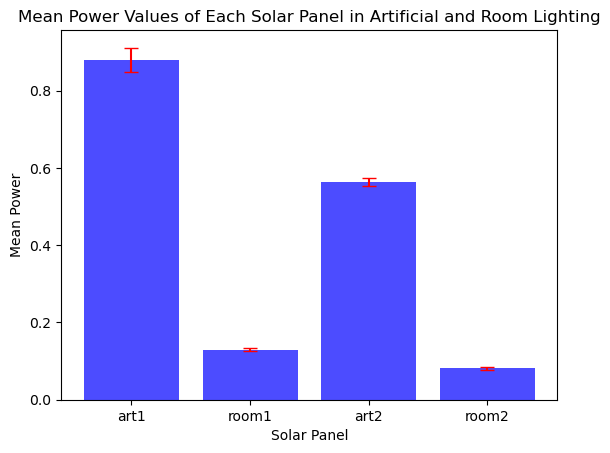

In [11]:
#plot data and show the plot
plt.xlabel('Solar Panel')
plt.ylabel('Mean Power')
plt.title('Mean Power Values of Each Solar Panel in Artificial and Room Lighting')
errors=[P_sem_art1, P_sem_room1, P_sem_art2, P_sem_room2]
plt.bar(columns, mean_powers, color='b', alpha=0.7)
plt.errorbar(columns, mean_powers, yerr=errors, capsize=5, fmt='none', ecolor='r')
plt.savefig('images/mean_power.png')
plt.show()

Now, we can graphically see the differences between the solar panels and their error margins. Again, "art" means "artificial lighting, while "room" means "room lighting." Solar Panel 1 is the cheap solar panel, while Soalr Panel 2 is the expensive one.

## Set up t-test function

The t-test used to calculate the statistical significance (if there is a noticeable difference between the two panels) is as follows:

$$
\large{t_{stat}=\frac{\left | \bar{x_{1}}-\bar{x_{2}} \right |}{\sqrt{(\frac{\sigma _{1}}{\sqrt{n_{1}}})^{2}+(\frac{\sigma _{2}}{\sqrt{n_{2}}})^{2}}}}
$$

where:

$\left | \bar{x_{1}}-\bar{x_{2}} \right |$ is the absolute value (distance from zero) of the difference between the two means ($x_{1}$ and $x_{2}$),

$\sigma _{1}$ and $\sigma _{2}$ are the standard deviations of each respective solar panel, and...

$ n_{1}$ and $n_{2}$ are the number of trials run on each panel , both set at $n_{1, 2} = 10$ samples (trials).

We set up the equation here:

In [12]:
def t_test(x1, x2, sd1, sd2):
    return (abs(x1 - x2)) / math.sqrt(((sd1/math.sqrt(10))**2) + ((sd2/math.sqrt(10))**2))

## t-test for voltage and current values

In [13]:
print("Light voltage t-stat: {0:0.5f}".format(t_test(df['voltage_art2'].mean(numeric_only=True), df['voltage_art1'].mean(numeric_only=True), df['voltage_art2'].std(numeric_only=True), df['voltage_art1'].std(numeric_only=True))))
print("Room voltage t-stat: {0:0.5f}".format(t_test(df['voltage_room2'].mean(numeric_only=True), df['voltage_room1'].mean(numeric_only=True), df['voltage_room2'].std(numeric_only=True), df['voltage_room1'].std(numeric_only=True))))
print("Light current t-stat: {0:0.5f}".format(t_test(df['current_art2'].mean(numeric_only=True), df['current_art1'].mean(numeric_only=True), df['current_art2'].std(numeric_only=True), df['current_art1'].std(numeric_only=True))))
print("Room current t-stat: {0:0.5f}".format(t_test(df['current_room2'].mean(numeric_only=True), df['current_room1'].mean(numeric_only=True), df['current_room2'].std(numeric_only=True), df['current_room1'].std(numeric_only=True))))

Light voltage t-stat: 0.78473
Room voltage t-stat: 1.60074
Light current t-stat: 10.00192
Room current t-stat: 15.92168


### Analysis of results
- Voltage Art: Difference is NOT statistically significant (<span style="color:blue">p = 0.22639</span><span style="color:green"><b> > 0.05</b></span>)
- Voltage Room: Difference is NOT statistically significant (<span style="color:blue">p = 0.07195</span><span style="color:green"><b> > 0.05</b></span>)
- Voltage Dark: Difference is VERY HIGHLY significant (<span style="color:blue">p = 4.61021 x 10<sup>-6</sup></span><span style="color:red"><b> &lt; 0.001</b></span>)
- Current Art: Difference is VERY HIGHLY significant (<span style="color:blue">p = 1.78626 x 10<sup>-6</sup></span><span style="color:red"><b> &lt; 0.001</b></span>)
- Current Room: Difference is VERY HIGHLY significant (<span style="color:blue">p = 3.35692 x 10<sup>-8</sup></span><span style="color:red"><b> &lt; 0.001</b></span>)
- Current Dark: NaN (all values are 0)

**NOTE: The p-values were calculated with R.**

The code for calculating the p-value in RStudio is:

```python
> 1-pt(t-stat, df=9)
```
Based on the data alone, it is hard to tell if one solar panel is "better" than the other. This study was done indoors; the amount of shade/light given the position could have made a slight difference. Additionally, the distance away that the light was from the panel was inconsistent.

## t-test for power values

The voltage and current statistics showed inconsistent results, but the important thing is the power. Will we generate more electricity in a certain period of time with one panel than the other? Let's find out.

In [14]:
# Create a dictionary to store mean power for each column
mean_power_dict = {}

for col, mean_power in zip(columns, mean_powers):
    mean_power_dict[col] = mean_power

# Now you have a dictionary with mean power values for each column
#print(mean_power_dict)


art1_power = mean_power_dict['art1']
room1_power = mean_power_dict['room1']
art2_power = mean_power_dict['art2']
room2_power = mean_power_dict['room2']

In [15]:
#calculates t-stat and prints values accordingly
print("Bright light t-stat: {0:0.5f}".format(t_test(art2_power, art1_power, P_std_art2, P_std_art1)))
print("Room light t-stat: {0:0.5f}".format(t_test(room2_power, room1_power, P_std_room2, P_std_room1)))

Bright light t-stat: 9.36691
Room light t-stat: 16.08616


### Analysis of results

- Bright light: Difference is VERY HIGHLY significant (<span style="color:blue">p = 3.07511 x 10<sup>-6</sup></span> <span style="color:red"><b>&lt; 0.001</b></span>)
- Room light: Difference is VERY HIGHLY significant (<span style="color:blue">p = 3.06910 x 10<sup>-8</sup> </span> <span style="color:red"><b>&lt; 0.001</b></span>)

The data indicates a very highly significant difference between each solar panel’s power, however, there are multiple flaws that caused the data to be inaccurate. The cheaper solar panel seems to have a better performance than the more expensive one, which is the opposite of what was predicted. The distance from  where the flashlight was held as well as the amount of light shining on the panel from the ceiling (shadows, etc.) had an impact as well. Therefore, more measurements should be taken to definitively say if one panel is better than the other.

## So why does this matter anyways?

Solar panel evaluation is a critical step towards a sustainable energy future. As the world confronts climate change, solar energy offers a promising alternative to fossil fuels.  Effective evaluation helps identify the most efficient and reliable solar panels, accelerating the shift towards renewable energy sources.

Beyond environmental benefits, evaluation directly impacts economic viability. By analyzing factors like conversion efficiency and maintenance costs, experts guide consumers and businesses towards cost-effective solutions that maximize energy production. This economic aspect is crucial for large-scale adoption, especially in regions transitioning to renewable energy.

Rigorous evaluation also fosters innovation in the solar industry. Testing drives improvements in solar cell design, manufacturing, and energy storage, leading to ever-more efficient and reliable technologies. This cycle of innovation not only increases solar energy's competitiveness but also stimulates job creation and economic growth within the renewable energy sector.

Furthermore, evaluation ensures safety and reliability.  Through testing protocols that assess performance under various environmental conditions, potential weaknesses are identified early on.  This allows manufacturers to improve product quality and longevity, protecting both consumers and the environment.

In conclusion, solar panel evaluation goes beyond individual installations. It has far-reaching environmental, economic, and technological implications. By informing decision-making, driving innovation, and safeguarding quality standards, robust evaluation practices are essential for unlocking the full potential of solar energy and achieving a sustainable energy future.

<h1 style="color:red; text-align:center">Hooray for Solar Energy!!!</h1>

## Credits

1. Special thanks to Dr. Chris Bachmann, Joe Rudmin, Riley Alkhayat, Cat Kruse, and Rachel Vanlandingham for making this lab possible.
2. AI Disclaimer: This report may contain AI-generated content from ChatGPT, Gemini, or other sources.